In [12]:
!nvidia-smi

isLocalServer = True
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID_model_rebuild/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd

Fri Sep 30 10:00:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   32C    P0    33W / 250W |   3096MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P100-PCIE...  Off  | 00000000:06:00.0 Off |                    0 |
| N/A   

In [21]:
from data_preprocessing import loadNumpy
emb_numpy = loadNumpy('./data', 'face_data_emb.npy')
label_numpy = loadNumpy('./data', 'face_data_label.npy')

print(f'shape: {emb_numpy.shape} {label_numpy.shape}')

loading from ./data/face_data_emb.npy
loading from ./data/face_data_label.npy
shape: (399, 512) (399,)


df shape: (399, 3)


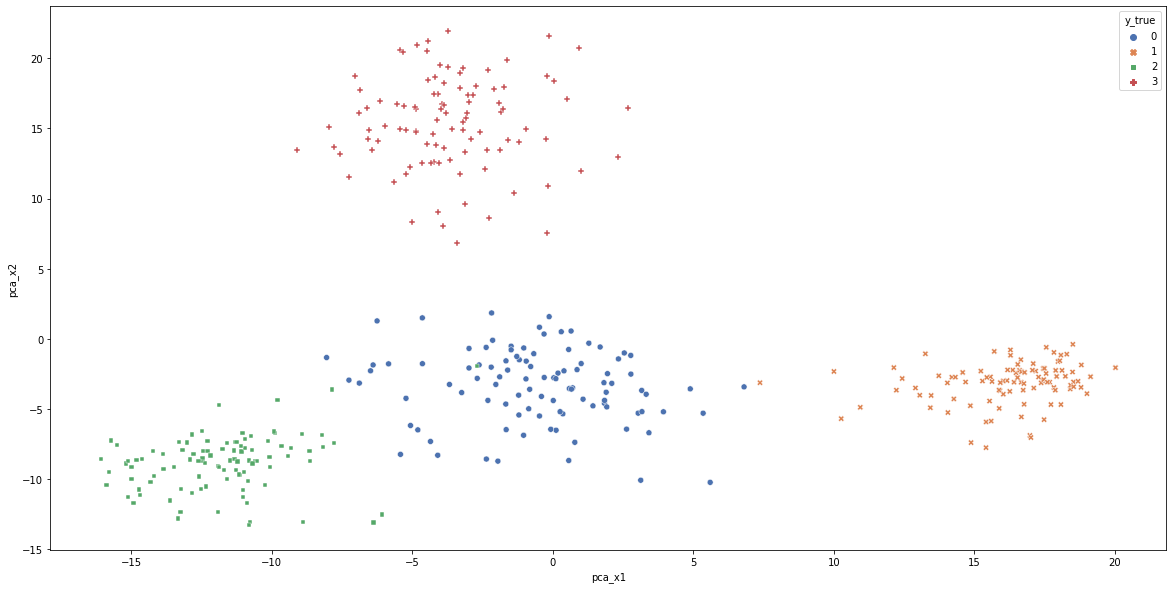

In [60]:
from utils import show_pca
user_names = cfg['user_names']

show_pca(emb_numpy, label_numpy)